case_year: The year in which the H-1B visa application was submitted.

case_status: The status of the visa application, which can be certified, denied, certified-withdrawn, withdrawn, or pending.

case_submitted: The date on which the visa application was submitted.

decision_date: The date on which a decision was made about the visa application.

emp_name: The name of the employer submitting the visa application.

emp_city: The city where the employer is located.

emp_state: The state where the employer is located.

emp_zip: The zip code where the employer is located.

emp_country: The country where the employer is located.

job_title: The job title of the H-1B visa applicant.

soc_code: The Standard Occupational Classification (SOC) code for the job title.

soc_name: The name of the occupation for which the H-1B visa is being sought, as defined by the SOC system.

full_time_position: Whether the H-1B visa application is for a full-time or part-time position.

prevailing_wage: The wage rate paid to similarly employed workers in the same occupation and geographical area as the H-1B visa applicant.

pw_unit: The unit of pay used for the prevailing wage, which can be hourly, weekly, bi-weekly, monthly, or annually.

pw_level: The level of the prevailing wage, which can be Level I, Level II, Level III, Level IV, or Other.

wage_from: The minimum wage offered to the H-1B visa applicant.

wage_to: The maximum wage offered to the H-1B visa applicant.

wage_unit: The unit of pay used for the wage, which can be hourly, weekly, bi-weekly, monthly, or annually.

work_city: The city where the H-1B visa applicant will be working.

work_state: The state where the H-1B visa applicant will be working.

emp_h1b_dependent: Whether the employer is H-1B visa-dependent or not.

emp_willful_violator: Whether the employer has been found to be a willful violator of H-1B program requirements.

lat: The latitude of the work location.

lng: The longitude of the work location.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("h1b_data.csv")

In [3]:
df1 = df[df["case_year"]==2017]
df1.head()

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,emp_country,job_title,...,pw_level,wage_from,wage_to,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator,lat,lng
0,2017,C,2017-02-06,2017-02-10,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,29646,USA,NEPHROLOGIST,...,NaN,190000.00,0.0,Y,ABBEVILLE,SC,N,N,34.178172,-82.379015
1,2017,C,2017-03-21,2017-03-27,UNIVERSITY OF IDAHO,MOSCOW,ID,83844,USA,POST DOCTORAL FELLOW,...,Level I,47507.00,0.0,Y,ABERDEEN,ID,N,N,42.944078,-112.838326
2,2017,C,2017-03-17,2017-03-23,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,27265,USA,OPERATION ANALYST,...,Level I,65000.00,0.0,Y,ABERDEEN,MD,N,N,39.509556,-76.164120
3,2017,C,2017-03-10,2017-03-16,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,03431,USA,SR. INDUSTRIAL ENGINEER,...,Level II,86988.15,0.0,Y,ABERDEEN,MD,N,N,39.509556,-76.164120
4,2017,C,2017-08-04,2017-08-10,SANFORD CLINIC,SIOUX FALLS,SD,57117,NaN,HEMATOLOGIST/ONCOLOGIST,...,NaN,450000.00,0.0,Y,ABERDEEN,SD,N,N,45.464698,-98.486483


In [4]:
df1.shape

(579397, 25)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579397 entries, 0 to 579396
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   case_year             579397 non-null  int64  
 1   case_status           579397 non-null  object 
 2   case_submitted        579397 non-null  object 
 3   decision_date         579397 non-null  object 
 4   emp_name              579347 non-null  object 
 5   emp_city              579385 non-null  object 
 6   emp_state             579380 non-null  object 
 7   emp_zip               579383 non-null  object 
 8   emp_country           490916 non-null  object 
 9   job_title             579394 non-null  object 
 10  soc_code              579397 non-null  object 
 11  soc_name              579396 non-null  object 
 12  full_time_position    579395 non-null  object 
 13  prevailing_wage       579396 non-null  float64
 14  pw_unit               579369 non-null  object 
 15  

In [6]:
df1["case_status"].value_counts()

C     506801
CW     46700
W      18993
D       6903
Name: case_status, dtype: int64

#### Considering Withrawn and Certified Withdrawn as same category

In [7]:
df1["case_status"].replace("CW","W",inplace=True)

In [8]:
df1["case_status"].value_counts()

C    506801
W     65693
D      6903
Name: case_status, dtype: int64

## Finding missing values for each column

In [9]:
df1.isnull().sum()

case_year                    0
case_status                  0
case_submitted               0
decision_date                0
emp_name                    50
emp_city                    12
emp_state                   17
emp_zip                     14
emp_country              88481
job_title                    3
soc_code                     0
soc_name                     1
full_time_position           2
prevailing_wage              1
pw_unit                     28
pw_level                113541
wage_from                    0
wage_to                      0
wage_unit                    4
work_city                    0
work_state                   0
emp_h1b_dependent            2
emp_willful_violator         2
lat                          0
lng                          0
dtype: int64

In [10]:
df1["emp_country"].value_counts()

USA          490905
CANADA            7
AUSTRALIA         2
CAMBODIA          1
CHINA             1
Name: emp_country, dtype: int64

In [11]:
df1["emp_country"].fillna("USA", inplace=True)

In [12]:
df1["emp_country"].value_counts()

USA          579386
CANADA            7
AUSTRALIA         2
CAMBODIA          1
CHINA             1
Name: emp_country, dtype: int64

##### Since other countries are in minimal numbers dropping those rows

In [13]:
df1.drop(df1[df1["emp_country"] != "USA"].index, inplace=True)

In [14]:
df1[df1["emp_state"].isnull()]

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,emp_country,job_title,...,pw_level,wage_from,wage_to,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator,lat,lng
44518,2017,W,2017-04-21,2017-04-21,NaN,NaN,NaN,NaN,USA,SENIOR WEB DEVELOPER,...,Level III,122533.00,137533.0,Y,BELLEVUE,WA,Y,N,47.610377,-122.200679
83270,2017,C,2017-07-07,2017-07-13,"SYNAPTIVE MEDICAL USA, INC.",TORONTO,NaN,M5V 3B1,USA,CLINICAL APPLICATION SPECIALIST,...,NaN,78000.00,0.0,Y,CASTRO VALLEY,CA,N,N,37.694097,-122.086352
93222,2017,W,2017-04-13,2017-04-13,NaN,NaN,NaN,NaN,USA,DATABASE ADMINISTRATOR,...,Level I,70000.00,0.0,Y,CHARLOTTE,NC,Y,N,35.227087,-80.843127
253072,2017,D,2017-03-02,2017-03-06,NaN,NaN,NaN,NaN,USA,PROGRAMMER ANALYST,...,Level I,60000.00,0.0,Y,LAKE MARY,FL,Y,N,28.758883,-81.317845
477435,2017,C,2017-07-06,2017-07-12,LULULEMON USA INC.,VANCOUVER,NaN,V6J 1C7,USA,SENIOR CQ (AEM) DEVELOPER,...,NaN,130000.00,0.0,Y,SAN FRANCISCO,CA,N,N,37.774929,-122.419415
483307,2017,W,2017-03-10,2017-03-10,NaN,NaN,NaN,NaN,USA,SOFTWARE DEVELOPER,...,Level II,59.94,0.0,H,SAN JOSE,CA,Y,N,37.339386,-121.894955


##### Replacing the null values in state column with mode

In [15]:
df1["emp_state"].mode()

0    CA
dtype: object

In [16]:
df1["emp_state"].fillna("CA", inplace=True)

In [17]:
df1[df1["emp_city"].isnull()]

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,emp_country,job_title,...,pw_level,wage_from,wage_to,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator,lat,lng
12270,2017,C,2016-10-21,2016-10-27,"ITHAKA HARBORS, INC.",NaN,NY,10006,USA,SOFTWARE ENGINEER,...,Level III,105000.00,0.0,Y,ANN ARBOR,MI,N,N,42.270872,-83.726329
44518,2017,W,2017-04-21,2017-04-21,NaN,NaN,CA,NaN,USA,SENIOR WEB DEVELOPER,...,Level III,122533.00,137533.0,Y,BELLEVUE,WA,Y,N,47.610377,-122.200679
57899,2017,C,2016-11-07,2016-11-14,FLORIDA ATLANTIC UNIVERSITY,NaN,FL,33431,USA,ASSISTANT PROFESSOR,...,Level II,75000.00,0.0,Y,BOCA RATON,FL,N,N,26.358688,-80.083098
58013,2017,C,2016-11-01,2016-11-07,FLORIDA ATLANTIC UNIVERSITY,NaN,FL,33431,USA,ASSISTANT PROFESSOR,...,Level I,75000.00,0.0,Y,BOCA RATON,FL,N,N,26.358688,-80.083098
58171,2017,C,2017-04-04,2017-04-10,FLORIDA ATLANTIC UNIVERSITY,NaN,FL,33431,USA,ASSISTANT PROFESSOR,...,Level I,72720.00,0.0,Y,BOCA RATON,FL,N,N,26.358688,-80.083098
60682,2017,C,2017-03-08,2017-03-14,BOSTON GODEARS CONSULTING LLC,NaN,MA,02111,USA,STAFF ACCOUNTANT,...,Level I,26.69,0.0,H,BOSTON,MA,N,N,42.358431,-71.059773
93222,2017,W,2017-04-13,2017-04-13,NaN,NaN,CA,NaN,USA,DATABASE ADMINISTRATOR,...,Level I,70000.00,0.0,Y,CHARLOTTE,NC,Y,N,35.227087,-80.843127
150335,2017,C,2016-12-28,2017-01-04,HANCE INCORPORATED,NaN,DE,19713,USA,SENIOR TECHNICAL BUSINESS ANALYST,...,Level II,72000.00,0.0,Y,DUBLIN,OH,Y,N,40.099229,-83.114077
253072,2017,D,2017-03-02,2017-03-06,NaN,NaN,CA,NaN,USA,PROGRAMMER ANALYST,...,Level I,60000.00,0.0,Y,LAKE MARY,FL,Y,N,28.758883,-81.317845
408853,2017,C,2017-06-15,2017-06-21,AURORA ORGANIC FARMS INC.,NaN,CO,80302,USA,GRAZING SYSTEMS REPRODUCTION TECHNICIAN,...,Level II,70000.00,0.0,Y,PLATTEVILLE,CO,N,N,40.214983,-104.822749


In [18]:
df1[df1["emp_city"].isnull()]

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,emp_country,job_title,...,pw_level,wage_from,wage_to,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator,lat,lng
12270,2017,C,2016-10-21,2016-10-27,"ITHAKA HARBORS, INC.",NaN,NY,10006,USA,SOFTWARE ENGINEER,...,Level III,105000.00,0.0,Y,ANN ARBOR,MI,N,N,42.270872,-83.726329
44518,2017,W,2017-04-21,2017-04-21,NaN,NaN,CA,NaN,USA,SENIOR WEB DEVELOPER,...,Level III,122533.00,137533.0,Y,BELLEVUE,WA,Y,N,47.610377,-122.200679
57899,2017,C,2016-11-07,2016-11-14,FLORIDA ATLANTIC UNIVERSITY,NaN,FL,33431,USA,ASSISTANT PROFESSOR,...,Level II,75000.00,0.0,Y,BOCA RATON,FL,N,N,26.358688,-80.083098
58013,2017,C,2016-11-01,2016-11-07,FLORIDA ATLANTIC UNIVERSITY,NaN,FL,33431,USA,ASSISTANT PROFESSOR,...,Level I,75000.00,0.0,Y,BOCA RATON,FL,N,N,26.358688,-80.083098
58171,2017,C,2017-04-04,2017-04-10,FLORIDA ATLANTIC UNIVERSITY,NaN,FL,33431,USA,ASSISTANT PROFESSOR,...,Level I,72720.00,0.0,Y,BOCA RATON,FL,N,N,26.358688,-80.083098
60682,2017,C,2017-03-08,2017-03-14,BOSTON GODEARS CONSULTING LLC,NaN,MA,02111,USA,STAFF ACCOUNTANT,...,Level I,26.69,0.0,H,BOSTON,MA,N,N,42.358431,-71.059773
93222,2017,W,2017-04-13,2017-04-13,NaN,NaN,CA,NaN,USA,DATABASE ADMINISTRATOR,...,Level I,70000.00,0.0,Y,CHARLOTTE,NC,Y,N,35.227087,-80.843127
150335,2017,C,2016-12-28,2017-01-04,HANCE INCORPORATED,NaN,DE,19713,USA,SENIOR TECHNICAL BUSINESS ANALYST,...,Level II,72000.00,0.0,Y,DUBLIN,OH,Y,N,40.099229,-83.114077
253072,2017,D,2017-03-02,2017-03-06,NaN,NaN,CA,NaN,USA,PROGRAMMER ANALYST,...,Level I,60000.00,0.0,Y,LAKE MARY,FL,Y,N,28.758883,-81.317845
408853,2017,C,2017-06-15,2017-06-21,AURORA ORGANIC FARMS INC.,NaN,CO,80302,USA,GRAZING SYSTEMS REPRODUCTION TECHNICIAN,...,Level II,70000.00,0.0,Y,PLATTEVILLE,CO,N,N,40.214983,-104.822749


##### Imputing null values in emp_city column based on mode of emp_name

In [19]:
df1[df1["emp_name"]=="FLORIDA ATLANTIC UNIVERSITY"]["emp_city"].mode()

0    BOCA RATON
dtype: object

In [20]:
df1.loc[(df1["emp_name"] == "FLORIDA ATLANTIC UNIVERSITY") & (df1["emp_city"].isnull()), "emp_city"] = "BOCA RATON"

In [21]:
df1[df1["emp_name"]=="ITHAKA HARBORS, INC."]["emp_city"].mode()

0    NEW YORK
dtype: object

In [22]:
df1.loc[(df1["emp_name"] == "ITHAKA HARBORS, INC.") & (df1["emp_city"].isnull()), "emp_city"] = "NEW YORK"

In [23]:
df1[df1["emp_name"]=="BOSTON GODEARS CONSULTING LLC"]["emp_city"].mode()

0    BOSTON
dtype: object

In [24]:
df1.loc[(df1["emp_name"] == "BOSTON GODEARS CONSULTING LLC") & (df1["emp_city"].isnull()), "emp_city"] = "BOSTON"

In [25]:
df1[df1["emp_name"]=="HANCE INCORPORATED"]["emp_city"].mode()

0      NEWARK
1    SOMERSET
dtype: object

In [26]:
df1.loc[(df1["emp_name"] == "HANCE INCORPORATED") & (df1["emp_city"].isnull()), "emp_city"] = "NEWARK"

In [27]:
df1[df1["emp_name"]=="AURORA ORGANIC FARMS INC."]["emp_city"].mode()

0    BOULDER
dtype: object

In [28]:
df1.loc[(df1["emp_name"] == "AURORA ORGANIC FARMS INC.") & (df1["emp_city"].isnull()), "emp_city"] = "BOULDER"

In [29]:
df1[df1["emp_name"]=="EBAY, INC."]["emp_city"].mode()

0    SAN JOSE
dtype: object

In [30]:
df1.loc[(df1["emp_name"] == "EBAY, INC.") & (df1["emp_city"].isnull()), "emp_city"] = "SAN JOSE"

In [31]:
df1[df1["emp_state"] == "CA"]["emp_city"].mode()

0    SAN FRANCISCO
dtype: object

In [32]:
df1.loc[(df1["emp_state"] == "CA") & (df1["emp_city"].isnull()), "emp_city"] = "SAN FRANCISCO"

##### Imputing null values in zip code column with mode

In [33]:
df1["emp_zip"].mode()

0    75024
dtype: object

In [34]:
df1.loc[df1["emp_zip"].isnull(), "emp_zip"] = "75024"

##### Imputing null values in emp_name with mode of emp_name in each city

In [35]:
city = df1[df1["emp_name"].isnull()]["emp_city"]
city_list = list(city.unique())
city_list

['ALISO VIEJO',
 'ARLINGTON',
 'MARIETTA',
 'SAN FRANCISCO',
 'BERKELEY',
 'EL SEGUNDO',
 'COLUMBIA',
 'ATLANTA',
 'MADISON',
 'EAST BRUNSWICK',
 'FAIR LAWN',
 'EDISON',
 'RICHLANDS',
 'GAITHERSBURG',
 'GURABO',
 'ALPHARETTA',
 'MOUNTAIN VIEW',
 'NEW YORK',
 'SANTA CLARA',
 'PURCHASE',
 'SIMPSONVILLE',
 'WASHINGTON']

In [36]:
for i in city_list:
    x = df1[df1["emp_city"] == i]["emp_name"].mode()
    df1.loc[(df1["emp_city"] == i) & (df1["emp_name"].isnull()), "emp_name"] = x[0]

##### Imputing null values in Job_title with mode

In [37]:
df1["job_title"].mode()

0    PROGRAMMER ANALYST
dtype: object

In [38]:
df1.loc[df1["job_title"].isnull(), "job_title"] = "PROGRAMMER ANALYST"

##### imputing null values in soc_name with mode

In [39]:
df1["soc_name"].mode()

0    SOFTWARE DEVELOPERS, APPLICATIONS
dtype: object

In [40]:
df1.loc[df1["soc_name"].isnull(), "soc_name"] = "SOFTWARE DEVELOPERS, APPLICATIONS"

##### Imputing null values in full_time_position with mode

In [41]:
df1["full_time_position"].mode()

0    Y
dtype: object

In [42]:
df1.loc[df1["full_time_position"].isnull(), "full_time_position"] = "Y"

In [43]:
df1.isnull().sum()

case_year                    0
case_status                  0
case_submitted               0
decision_date                0
emp_name                     0
emp_city                     0
emp_state                    0
emp_zip                      0
emp_country                  0
job_title                    0
soc_code                     0
soc_name                     0
full_time_position           0
prevailing_wage              1
pw_unit                     28
pw_level                113541
wage_from                    0
wage_to                      0
wage_unit                    4
work_city                    0
work_state                   0
emp_h1b_dependent            2
emp_willful_violator         2
lat                          0
lng                          0
dtype: int64

###### Since there are many outliers in prevailing_wage replacing with median

<AxesSubplot:xlabel='prevailing_wage'>

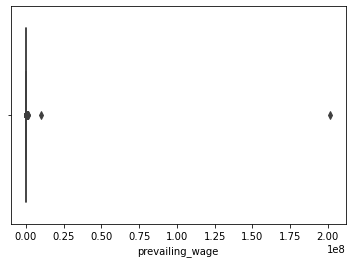

In [44]:
sns.boxplot(df1["prevailing_wage"])

In [45]:
x = df1["prevailing_wage"].median()

In [46]:
df1.loc[df1["prevailing_wage"].isnull(), "prevailing_wage"] = x

In [47]:
df_num = df.select_dtypes(include="number")
df_num.head()

,case_year,prevailing_wage,wage_from,wage_to,lat,lng
0,2017,187200.0,190000.00,0.0,34.178172,-82.379015
1,2017,39957.0,47507.00,0.0,42.944078,-112.838326
2,2017,59966.0,65000.00,0.0,39.509556,-76.164120
3,2017,78832.0,86988.15,0.0,39.509556,-76.164120
4,2017,169645.0,450000.00,0.0,45.464698,-98.486483


##### Imputing null values in pw_unit column with mode

In [48]:
df1["pw_unit"].mode()

0    Y
dtype: object

In [49]:
df1.loc[df1["pw_unit"].isnull(), "pw_unit"] = "Y"

##### Imputing null values in wage_unit column with mode

In [50]:
df1["wage_unit"].mode()

0    Y
dtype: object

In [51]:
df1.loc[df1["wage_unit"].isnull(), "wage_unit"] = "Y"

##### Imputing null values in emp_h1b_dependent column with mode

In [52]:
df1["emp_h1b_dependent"].mode()

0    N
dtype: object

In [53]:
df1.loc[df1["emp_h1b_dependent"].isnull(), "emp_h1b_dependent"] = "N"

##### Imputing null values in emp_willful_violator column with mode

In [54]:
df1["emp_willful_violator"].mode()

0    N
dtype: object

In [55]:
df1.loc[df1["emp_willful_violator"].isnull(), "emp_willful_violator"] = "N"

In [56]:
(df1.isnull().sum()/len(df1))*100

case_year                0.00000
case_status              0.00000
case_submitted           0.00000
decision_date            0.00000
emp_name                 0.00000
emp_city                 0.00000
emp_state                0.00000
emp_zip                  0.00000
emp_country              0.00000
job_title                0.00000
soc_code                 0.00000
soc_name                 0.00000
full_time_position       0.00000
prevailing_wage          0.00000
pw_unit                  0.00000
pw_level                19.59678
wage_from                0.00000
wage_to                  0.00000
wage_unit                0.00000
work_city                0.00000
work_state               0.00000
emp_h1b_dependent        0.00000
emp_willful_violator     0.00000
lat                      0.00000
lng                      0.00000
dtype: float64

##### Replacing wage_from column which had zero value with prevailing_wage

In [57]:
df1.loc[df1["wage_from"] == 0, "wage_from"] = df1["prevailing_wage"].apply(lambda x: x if pd.notnull(x) else 0)

##### Replacing prevailing_wage column which had zero value with wage_from

In [58]:
df1.loc[df1["prevailing_wage"] == 0, "prevailing_wage"] = df1["wage_from"].apply(lambda x: x if pd.notnull(x) else 0)

##### Dropping some of the features

In [59]:
df2 = df1.drop(["wage_to","case_year","case_submitted","decision_date","emp_zip","emp_country","wage_to","lat","lng"],axis=1)

##### Found few columns were encoded with different unit name but the wage is in different unit. Also the prevailing wage and wage_from are in different scale

In [60]:
df2[df2["pw_unit"] != df2["wage_unit"]]

,case_status,emp_name,emp_city,emp_state,job_title,soc_code,soc_name,full_time_position,prevailing_wage,pw_unit,pw_level,wage_from,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator
15,C,SAFEWAY INC.,PLEASANTON,CA,PHARMACY MANAGER,29-1051,PHARMACISTS,Y,120349.00,Y,Level III,67.50,H,ABERDEEN,WA,N,N
823,W,"APPSTEK, INC",ADDISON,TX,JAVA DEVELOPER - I,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,68827.00,Y,Level I,70000.00,M,ADDISON,TX,Y,N
1008,C,QUALUTION SYSTEMS INC.,AGOURA HILLS,CA,SOFTWARE DEVELOPER,15-1133,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",Y,137010.00,Y,Level IV,15600.00,M,AGOURA HILLS,CA,N,N
2745,D,"ROSE LITTLE BRAND & ASSOCIATES, P.C.",ALBUQUERQUE,NM,PROGRAMMING ENGINEER,15-1131,COMPUTER PROGRAMMERS,Y,57090.00,Y,NaN,28.85,H,ALBUQUERQUE,NM,N,N
3571,W,"SUNLAND EDUCATIONAL SCHOOLS, INC.",ANAHEIM,CA,TEACHER,25-2012,"KINDERGARTEN TEACHERS, EXCEPT SPECIAL EDUCATION",Y,45540.00,Y,Level I,45540.00,M,ALISO VIEJO,CA,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578782,W,"SMART WORKS, LLC",EDISON,NJ,SYSTEMS ANALYST,15-1121,COMPUTER SYSTEMS ANALYSTS,Y,60258.00,H,Level I,60258.00,Y,WYOMISSING,PA,Y,N
578792,W,"SMART WORKS, LLC",EDISON,NJ,SYSTEMS ANALYST,15-1121,COMPUTER SYSTEMS ANALYSTS,Y,60258.00,H,Level I,60258.00,Y,WYOMISSING,PA,Y,N
578923,C,"CONSUMER REPORTS, INC.",YONKERS,NY,DATA SCIENTIST,15-2041,STATISTICIANS,Y,1774.81,W,NaN,99929.80,Y,YONKERS,NY,N,N
579313,C,ADVANCED WOMEN'S HEALTHCARE,PALM SPRINGS,CA,OB GYN,29-1064,OBSTETRICIANS AND GYNECOLOGISTS,Y,90.00,H,Level I,187200.00,Y,YUCCA VALLEY,CA,N,N


In [61]:
df2.shape

(579386, 17)

In [62]:
(df2[df2["pw_unit"] != df2["wage_unit"]].shape[0])/len(df2)
# since the incorrect data is 0.001 percent of the original data dropping those rows

0.001259954503560666

In [63]:
mask = df2['pw_unit'] != df2['wage_unit']

# drop the rows that meet the condition
df2 = df2[~mask]
df2.shape

(578656, 17)

In [64]:
df2[df2["prevailing_wage"] <10000]

,case_status,emp_name,emp_city,emp_state,job_title,soc_code,soc_name,full_time_position,prevailing_wage,pw_unit,pw_level,wage_from,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator
16,C,"HEALTH CAROUSEL, LLC",CINCINNATI,OH,PHYSICAL THERAPIST,29-1123,PHYSICAL THERAPISTS,Y,28.66,H,Level I,28.66,H,ABERDEEN,WA,N,N
19,C,"MANAGEMENT HEALTH SYSTEMS, INC.",SUNRISE,FL,PHYSICAL THERAPIST,29-1123,PHYSICAL THERAPISTS,Y,32.02,H,Level I,40.00,H,ABILENE,TX,Y,N
24,C,HENDRICK MEDICAL CENTER,ABILENE,TX,CASE MANAGER,29-1141,REGISTERED NURSES,Y,29.21,H,Level III,29.90,H,ABILENE,TX,N,N
25,C,"HEALTH CAROUSEL, LLC",CINCINNATI,OH,PHYSICAL THERAPIST,29-1123,PHYSICAL THERAPISTS,Y,32.02,H,Level I,32.02,H,ABILENE,TX,N,N
30,C,"SNOWMASS ENERGY PARTNERS, LTD.",ABILENE,TX,ACCOUNTANT,13-2011,ACCOUNTANTS AND AUDITORS,N,24.92,H,Level II,26.28,H,ABILENE,TX,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579359,C,KESARI HOSPITALITY LLC,YUMA,AZ,MARKET RESEARCH ANALYST,13-1161,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,15.00,H,Level I,15.00,H,YUMA,AZ,N,N
579368,C,"OHIO DENTAL ASSOCIATES - JUDGE, INC.",EAST SYRACUSE,NY,DENTIST (ASSOCIATE),29-1021,"DENTISTS, GENERAL",N,55.79,H,Level I,75.00,H,ZANESVILLE,OH,N,N
579372,C,"ONR NATIONAL SPEECH PATHOLOGY, INC.",AUSTIN,TX,PHYSICAL THERAPIST/ASSISTANT DIRECTOR OF REHAB,29-1123,PHYSICAL THERAPISTS,Y,32.52,H,Level II,42.00,H,ZEARING,IA,N,N
579381,C,REST HAVEN ILLIANA CHRISTIAN CONVALESCENT HOME,TINLEY PARK,IL,UNIT MANAGER,11-9111,MEDICAL AND HEALTH SERVICES MANAGERS,Y,31.00,H,Level I,31.00,H,ZEELAND,MI,N,N


##### Converting all the prevailing wage to standard unit "Yearly"

In [65]:
# Create a dictionary to map pw_unit values to conversion factors
unit_to_factor = {
    "H": 2080,
    "W": 52,
    "BW": 26,
    "M": 12,
    "Y": 1
}

# Apply the conversion factor based on the pw_unit value
df2["prevailing_wage"] = df2["prevailing_wage"] * df2["pw_unit"].map(unit_to_factor)


##### Converting all the wage_from to standard unit "Yearly"

In [66]:
# Create a dictionary to map pw_unit values to conversion factors
unit_to_factor = {
    "H": 2080,
    "W": 52,
    "BW": 26,
    "M": 12,
    "Y": 1
}

# Apply the conversion factor based on the pw_unit value
df2["wage_from"] = df2["wage_from"] * df2["wage_unit"].map(unit_to_factor)


In [67]:
df2[df2["prevailing_wage"] <10000]

,case_status,emp_name,emp_city,emp_state,job_title,soc_code,soc_name,full_time_position,prevailing_wage,pw_unit,pw_level,wage_from,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator
110412,D,"KNOWBE4, INC.",CLEARWATER,FL,SOFTWARE ENGINEER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,25.58,Y,Level I,50000.0,Y,CLEARWATER,FL,N,N


In [68]:
df2.shape

(578656, 17)

In [69]:
mask = df2["prevailing_wage"] <10000

# drop the rows that meet the condition
df2 = df2[~mask]
df2.shape

(578655, 17)

In [70]:
df2["prevailing_wage"] = round(df2["prevailing_wage"],2)
df2["wage_from"] = round(df2["wage_from"],2)

##### Since all the wages are converted to standard unit "yearly". Dropping the unit columns

In [71]:
df2.drop(["pw_unit","wage_unit"],axis=1,inplace=True)

##### Encoding full_time_position, emp_h1b_dependent, emp_willful_violator with 0 for "N" and 1 for "Y"

In [72]:
df2[["full_time_position","emp_h1b_dependent","emp_willful_violator"]] = df2[["full_time_position","emp_h1b_dependent","emp_willful_violator"]].replace({"Y": 1,"N": 0})

<AxesSubplot:xlabel='prevailing_wage'>

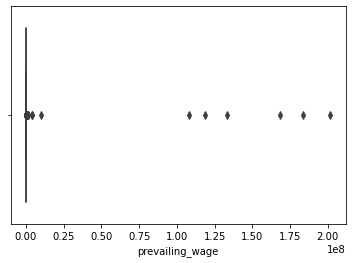

In [73]:
sns.boxplot(df2["prevailing_wage"])

In [74]:
df_eda = df2

##### Frequency encoding

In [75]:
for col in ["emp_name","emp_city","emp_state","job_title","soc_code","soc_name","work_city","work_state"]:
    freq = df2[col].value_counts()
    df2[col + '_freq'] = df2[col].map(freq)

df2.head()

,case_status,emp_name,emp_city,emp_state,job_title,soc_code,soc_name,full_time_position,prevailing_wage,pw_level,...,emp_h1b_dependent,emp_willful_violator,emp_name_freq,emp_city_freq,emp_state_freq,job_title_freq,soc_code_freq,soc_name_freq,work_city_freq,work_state_freq
0,C,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,NEPHROLOGIST,29-1063,"INTERNISTS, GENERAL",1,187200.0,NaN,...,0,0,2,24,1443,266,1678,1684,1,2760
1,C,UNIVERSITY OF IDAHO,MOSCOW,ID,POST DOCTORAL FELLOW,19-1013,SOIL AND PLANT SCIENTISTS,1,39957.0,Level I,...,0,0,29,29,598,150,410,410,16,847
2,C,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,OPERATION ANALYST,15-2031,OPERATIONS RESEARCH ANALYSTS,1,59966.0,Level I,...,0,0,31,54,17574,13,9040,9037,16,9544
3,C,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,SR. INDUSTRIAL ENGINEER,17-2112,INDUSTRIAL ENGINEERS,1,78832.0,Level II,...,0,0,28,34,978,6,3309,3315,16,9544
4,C,SANFORD CLINIC,SIOUX FALLS,SD,HEMATOLOGIST/ONCOLOGIST,29-1069,"PHYSICIANS AND SURGEONS, ALL OTHER",1,169645.0,NaN,...,0,0,32,99,216,27,5247,5246,16,292


In [76]:
df3 = df2.copy()
df3.head()

,case_status,emp_name,emp_city,emp_state,job_title,soc_code,soc_name,full_time_position,prevailing_wage,pw_level,...,emp_h1b_dependent,emp_willful_violator,emp_name_freq,emp_city_freq,emp_state_freq,job_title_freq,soc_code_freq,soc_name_freq,work_city_freq,work_state_freq
0,C,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,NEPHROLOGIST,29-1063,"INTERNISTS, GENERAL",1,187200.0,NaN,...,0,0,2,24,1443,266,1678,1684,1,2760
1,C,UNIVERSITY OF IDAHO,MOSCOW,ID,POST DOCTORAL FELLOW,19-1013,SOIL AND PLANT SCIENTISTS,1,39957.0,Level I,...,0,0,29,29,598,150,410,410,16,847
2,C,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,OPERATION ANALYST,15-2031,OPERATIONS RESEARCH ANALYSTS,1,59966.0,Level I,...,0,0,31,54,17574,13,9040,9037,16,9544
3,C,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,SR. INDUSTRIAL ENGINEER,17-2112,INDUSTRIAL ENGINEERS,1,78832.0,Level II,...,0,0,28,34,978,6,3309,3315,16,9544
4,C,SANFORD CLINIC,SIOUX FALLS,SD,HEMATOLOGIST/ONCOLOGIST,29-1069,"PHYSICIANS AND SURGEONS, ALL OTHER",1,169645.0,NaN,...,0,0,32,99,216,27,5247,5246,16,292


In [77]:
df3.drop(["case_status","emp_name","emp_city","emp_state","job_title","soc_code","soc_name","work_city","work_state"],axis=1,inplace=True)

In [78]:
df3.head()

,full_time_position,prevailing_wage,pw_level,wage_from,emp_h1b_dependent,emp_willful_violator,emp_name_freq,emp_city_freq,emp_state_freq,job_title_freq,soc_code_freq,soc_name_freq,work_city_freq,work_state_freq
0,1,187200.0,NaN,190000.00,0,0,2,24,1443,266,1678,1684,1,2760
1,1,39957.0,Level I,47507.00,0,0,29,29,598,150,410,410,16,847
2,1,59966.0,Level I,65000.00,0,0,31,54,17574,13,9040,9037,16,9544
3,1,78832.0,Level II,86988.15,0,0,28,34,978,6,3309,3315,16,9544
4,1,169645.0,NaN,450000.00,0,0,32,99,216,27,5247,5246,16,292


##### Spliting the dataframe into 2, df with null values in pw_level and df without null values in pw_level 

In [79]:
df_non_null = df3[df3["pw_level"].notnull()]
df_null = df3[df3["pw_level"].isnull()]

In [80]:
x = df_non_null.drop("pw_level",axis=1)
y = df_non_null["pw_level"]

In [81]:
x.isnull().sum()

full_time_position      0
prevailing_wage         0
wage_from               0
emp_h1b_dependent       0
emp_willful_violator    0
emp_name_freq           0
emp_city_freq           0
emp_state_freq          0
job_title_freq          0
soc_code_freq           0
soc_name_freq           0
work_city_freq          0
work_state_freq         0
dtype: int64

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
sc = StandardScaler()
x_sc = pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x_sc

,full_time_position,prevailing_wage,wage_from,emp_h1b_dependent,emp_willful_violator,emp_name_freq,emp_city_freq,emp_state_freq,job_title_freq,soc_code_freq,soc_name_freq,work_city_freq,work_state_freq
0,0.150929,-0.074190,-0.070880,-0.801764,-0.028439,-0.427356,-0.796520,-1.426312,-0.478961,-1.197409,-1.127406,-0.642560,-1.147051
1,0.150929,-0.033551,-0.039336,-0.801764,-0.028439,-0.426907,-0.793914,-0.917876,-0.489580,-1.014828,-0.934480,-0.642560,-0.906115
2,0.150929,0.004765,0.000314,-0.801764,-0.028439,-0.427581,-0.795999,-1.414931,-0.490122,-1.136076,-1.062441,-0.642560,-0.906115
3,0.150929,0.111899,0.080725,-0.801764,-0.028439,-0.426682,-0.789224,-1.437753,-0.478031,-1.192818,-1.122486,-0.642560,-1.162426
4,0.150929,-0.063927,-0.063703,-0.801764,-0.028439,-0.433648,-0.793080,-1.437753,-0.490510,-1.183191,-1.112378,-0.642560,-1.162426
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465286,0.150929,-0.050406,-0.040123,-0.801764,-0.028439,-0.433648,-0.799334,-0.906465,-0.457336,-1.183530,-1.112601,-0.644261,-0.606394
465287,0.150929,0.003752,0.050826,1.247249,-0.028439,-0.387357,-0.721062,-1.314179,-0.484231,1.013313,0.841261,-0.643167,-1.007260
465288,0.150929,-0.044872,-0.048352,1.247249,-0.028439,-0.424435,-0.501361,-0.903500,0.044061,1.013313,0.841261,-0.643167,-1.007260
465289,0.150929,-0.011414,0.094103,-0.801764,-0.028439,-0.417918,-0.795061,-0.906465,0.024607,1.296789,1.501799,-0.643167,-1.007260


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
xtrain,xtest,ytrain,ytest = train_test_split(x_sc,y,test_size=0.3,random_state=100)

#### Building a predictive model to predict the 20% null values in pw_level

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dt = DecisionTreeClassifier()

In [88]:
model_dt = dt.fit(xtrain,ytrain)
ypred = model_dt.predict(xtest)

In [89]:
from sklearn.metrics import classification_report

In [90]:
result = classification_report(ytest,ypred)
print(result)

              precision    recall  f1-score   support

     Level I       0.95      0.95      0.95     61792
    Level II       0.92      0.92      0.92     50351
   Level III       0.87      0.87      0.87     17630
    Level IV       0.86      0.86      0.86      9815

    accuracy                           0.93    139588
   macro avg       0.90      0.90      0.90    139588
weighted avg       0.93      0.93      0.93    139588



In [91]:
x = df_null.drop("pw_level",axis=1)

In [92]:
x_sc_n = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [93]:
df_null["pw_level"] = model_dt.predict(x_sc_n)
df_null

,full_time_position,prevailing_wage,pw_level,wage_from,emp_h1b_dependent,emp_willful_violator,emp_name_freq,emp_city_freq,emp_state_freq,job_title_freq,soc_code_freq,soc_name_freq,work_city_freq,work_state_freq
0,1,187200.0,Level III,190000.0,0,0,2,24,1443,266,1678,1684,1,2760
4,1,169645.0,Level I,450000.0,0,0,32,99,216,27,5247,5246,16,292
6,1,187200.0,Level II,187200.0,0,0,32,99,216,198,462,466,16,292
10,1,187200.0,Level II,187200.0,0,0,32,99,216,198,462,466,16,292
11,1,187199.0,Level IV,187199.0,0,0,32,99,216,266,5247,5246,16,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579389,1,95805.0,Level IV,96000.0,0,0,3,5,2692,151,118303,117979,11,5893
579392,1,58968.0,Level I,58968.0,0,0,6833,11460,24064,119,118303,117979,11,5893
579393,1,106475.0,Level IV,106475.0,1,0,2545,2936,83583,20,2228,2199,11,5893
579395,1,58968.0,Level I,58968.0,0,0,6833,11460,24064,119,118303,117979,11,5893


In [94]:
df_non_null

,full_time_position,prevailing_wage,pw_level,wage_from,emp_h1b_dependent,emp_willful_violator,emp_name_freq,emp_city_freq,emp_state_freq,job_title_freq,soc_code_freq,soc_name_freq,work_city_freq,work_state_freq
1,1,39957.0,Level I,47507.00,0,0,29,29,598,150,410,410,16,847
2,1,59966.0,Level I,65000.00,0,0,31,54,17574,13,9040,9037,16,9544
3,1,78832.0,Level II,86988.15,0,0,28,34,978,6,3309,3315,16,9544
5,1,131581.0,Level I,131581.00,0,0,32,99,216,162,627,630,16,292
7,1,45010.0,Level I,51487.00,0,0,1,62,216,1,1082,1082,16,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579385,1,51667.2,Level I,64563.20,0,0,1,2,17955,429,1066,1072,2,20363
579386,1,78333.0,Level III,115000.00,1,0,207,753,4342,82,104904,88442,11,5893
579390,1,54392.0,Level I,60000.00,1,0,42,2861,18054,6898,104904,88442,11,5893
579391,1,70866.0,Level II,139000.00,0,0,71,43,17955,6647,118303,117979,11,5893


In [95]:
# Concatenate the dataframes
df_new = pd.concat([df_null, df_non_null])
df_new = df_new.sort_index()

In [96]:
df_new

,full_time_position,prevailing_wage,pw_level,wage_from,emp_h1b_dependent,emp_willful_violator,emp_name_freq,emp_city_freq,emp_state_freq,job_title_freq,soc_code_freq,soc_name_freq,work_city_freq,work_state_freq
0,1,187200.0,Level III,190000.00,0,0,2,24,1443,266,1678,1684,1,2760
1,1,39957.0,Level I,47507.00,0,0,29,29,598,150,410,410,16,847
2,1,59966.0,Level I,65000.00,0,0,31,54,17574,13,9040,9037,16,9544
3,1,78832.0,Level II,86988.15,0,0,28,34,978,6,3309,3315,16,9544
4,1,169645.0,Level I,450000.00,0,0,32,99,216,27,5247,5246,16,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579392,1,58968.0,Level I,58968.00,0,0,6833,11460,24064,119,118303,117979,11,5893
579393,1,106475.0,Level IV,106475.00,1,0,2545,2936,83583,20,2228,2199,11,5893
579394,1,77085.0,Level III,128520.00,1,0,207,753,4342,736,54304,49734,11,5893
579395,1,58968.0,Level I,58968.00,0,0,6833,11460,24064,119,118303,117979,11,5893


#### Updated the predicted pw_level to the original dataframe df1 for EDA purpose

In [97]:
df_eda["pw_level"] = df_new["pw_level"]

In [98]:
df_eda.drop(["emp_name_freq","emp_city_freq","emp_state_freq","job_title_freq","soc_code_freq","soc_name_freq","work_city_freq","work_state_freq"],axis=1,inplace=True)

In [99]:
df_eda.columns

Index(['case_status', 'emp_name', 'emp_city', 'emp_state', 'job_title',
       'soc_code', 'soc_name', 'full_time_position', 'prevailing_wage',
       'pw_level', 'wage_from', 'work_city', 'work_state', 'emp_h1b_dependent',
       'emp_willful_violator'],
      dtype='object')

## Exploratory Data Analysis

In [100]:
df_eda = df_eda.astype({'full_time_position': 'object', 'emp_h1b_dependent': 'object',"emp_willful_violator":"object"})

In [101]:
df_num = df_eda.select_dtypes(include="number")
df_num.head()

,prevailing_wage,wage_from
0,187200.0,190000.00
1,39957.0,47507.00
2,59966.0,65000.00
3,78832.0,86988.15
4,169645.0,450000.00


In [102]:
df_num.describe()

,prevailing_wage,wage_from
count,5.786550e+05,5.786550e+05
mean,7.876254e+04,8.918352e+04
std,5.033532e+05,5.551086e+05
min,1.508000e+04,1.500000e+04
25%,5.963400e+04,6.500000e+04
50%,7.178100e+04,7.791700e+04
75%,9.023670e+04,1.000000e+05
max,2.016227e+08,2.496000e+08


In [103]:
df_cat = df_eda.select_dtypes(include="object")
df_cat.head()

,case_status,emp_name,emp_city,emp_state,job_title,soc_code,soc_name,full_time_position,pw_level,work_city,work_state,emp_h1b_dependent,emp_willful_violator
0,C,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,NEPHROLOGIST,29-1063,"INTERNISTS, GENERAL",1,Level III,ABBEVILLE,SC,0,0
1,C,UNIVERSITY OF IDAHO,MOSCOW,ID,POST DOCTORAL FELLOW,19-1013,SOIL AND PLANT SCIENTISTS,1,Level I,ABERDEEN,ID,0,0
2,C,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,OPERATION ANALYST,15-2031,OPERATIONS RESEARCH ANALYSTS,1,Level I,ABERDEEN,MD,0,0
3,C,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,SR. INDUSTRIAL ENGINEER,17-2112,INDUSTRIAL ENGINEERS,1,Level II,ABERDEEN,MD,0,0
4,C,SANFORD CLINIC,SIOUX FALLS,SD,HEMATOLOGIST/ONCOLOGIST,29-1069,"PHYSICIANS AND SURGEONS, ALL OTHER",1,Level I,ABERDEEN,SD,0,0


In [104]:
df_cat.describe()

,case_status,emp_name,emp_city,emp_state,job_title,soc_code,soc_name,full_time_position,pw_level,work_city,work_state,emp_h1b_dependent,emp_willful_violator
count,578655,578655,578655,578655,578655,578655,578655,578655,578655,578655,578655,578655,578655
unique,3,63547,4592,54,85538,688,818,2,4,4870,53,2,2
top,C,INFOSYS LIMITED,PLANO,CA,PROGRAMMER ANALYST,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",1,Level I,NEW YORK,CA,0,0
freq,506462,20146,32615,97141,44237,118303,117979,566676,248814,33913,110161,357741,578231


### Univariate Analysis

In [105]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='prevailing_wage'>

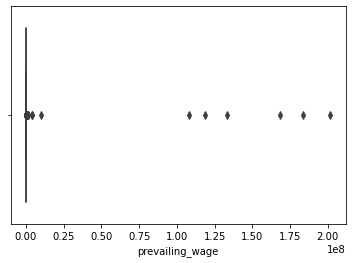

In [106]:
sns.boxplot(df_eda["prevailing_wage"])

<AxesSubplot:xlabel='wage_from'>

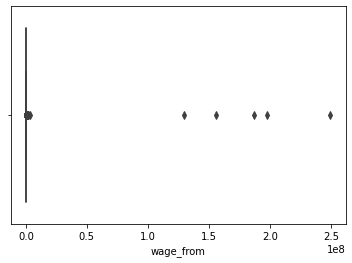

In [107]:
sns.boxplot(df_eda["wage_from"])

There are some outliers in prevailing_wage and wage_from columns

In [108]:
df_eda.shape

(578655, 15)

In [109]:
df_eda.isnull().sum()

case_status             0
emp_name                0
emp_city                0
emp_state               0
job_title               0
soc_code                0
soc_name                0
full_time_position      0
prevailing_wage         0
pw_level                0
wage_from               0
work_city               0
work_state              0
emp_h1b_dependent       0
emp_willful_violator    0
dtype: int64

<AxesSubplot:xlabel='prevailing_wage', ylabel='Density'>

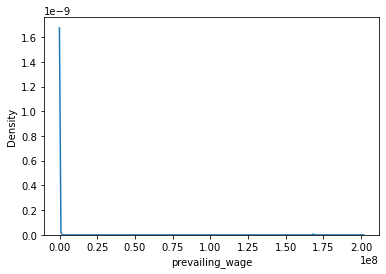

In [110]:
sns.kdeplot(df_eda["prevailing_wage"])

Distribution of prevailing wage with outliers

### Outlier Treatment

In [111]:
q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)
iqr = q3-q1
uw = q3 + 1.5 * iqr
lw = q1 - 1.5 * iqr
df_out = df_eda[~((df_eda<lw)|(df_eda>uw))]
df_out.shape

(578655, 15)

In [112]:
df_out.isnull().sum()/len(df_out)

case_status             0.000000
emp_name                0.000000
emp_city                0.000000
emp_state               0.000000
job_title               0.000000
soc_code                0.000000
soc_name                0.000000
full_time_position      0.000000
prevailing_wage         0.033348
pw_level                0.000000
wage_from               0.045170
work_city               0.000000
work_state              0.000000
emp_h1b_dependent       0.000000
emp_willful_violator    0.000000
dtype: float64

In [113]:
df_out = df_out.dropna(subset=["wage_from","prevailing_wage"])
df_out

,case_status,emp_name,emp_city,emp_state,job_title,soc_code,soc_name,full_time_position,prevailing_wage,pw_level,wage_from,work_city,work_state,emp_h1b_dependent,emp_willful_violator
1,C,UNIVERSITY OF IDAHO,MOSCOW,ID,POST DOCTORAL FELLOW,19-1013,SOIL AND PLANT SCIENTISTS,1,39957.0,Level I,47507.00,ABERDEEN,ID,0,0
2,C,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,OPERATION ANALYST,15-2031,OPERATIONS RESEARCH ANALYSTS,1,59966.0,Level I,65000.00,ABERDEEN,MD,0,0
3,C,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,SR. INDUSTRIAL ENGINEER,17-2112,INDUSTRIAL ENGINEERS,1,78832.0,Level II,86988.15,ABERDEEN,MD,0,0
5,C,SANFORD CLINIC,SIOUX FALLS,SD,FAMILY MEDICINE PHYSICIAN,29-1062,FAMILY AND GENERAL PRACTITIONERS,1,131581.0,Level I,131581.00,ABERDEEN,SD,0,0
7,C,NORTHERN STATE UNIVERSITY,ABERDEEN,SD,INSTRUCTOR OF BUSINESS ACCOUNTING,25-1011,"BUSINESS TEACHERS, POSTSECONDARY",1,45010.0,Level I,51487.00,ABERDEEN,SD,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579392,D,DELOITTE CONSULTING LLP,PHILADELPHIA,PA,SOLUTION SPECIALIST,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",1,58968.0,Level I,58968.00,ZIONSVILLE,IN,0,0
579393,C,COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,COLLEGE STATION,TX,SENIOR MANAGER JC45 - SALES ENGINEERS,41-9031,SALES ENGINEERS,1,106475.0,Level IV,106475.00,ZIONSVILLE,IN,1,0
579394,C,"PERFICIENT, INC.",ST. LOUIS,MO,SOLUTIONS ARCHITECT,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",1,77085.0,Level III,128520.00,ZIONSVILLE,IN,1,0
579395,C,DELOITTE CONSULTING LLP,PHILADELPHIA,PA,SOLUTION SPECIALIST,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",1,58968.0,Level I,58968.00,ZIONSVILLE,IN,0,0


<AxesSubplot:xlabel='prevailing_wage', ylabel='Density'>

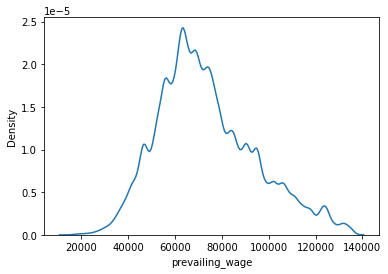

In [114]:
sns.kdeplot(df_out["prevailing_wage"])

Distribution after removing outliers

<AxesSubplot:xlabel='wage_from', ylabel='Density'>

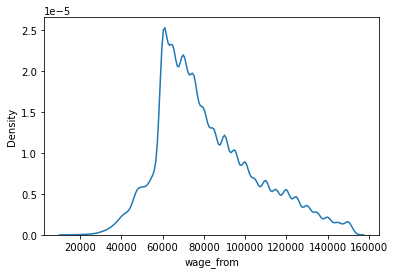

In [115]:
sns.kdeplot(df_out["wage_from"])

In [116]:
df_out["wage_from"].skew()

0.7239317568819638

<AxesSubplot:xlabel='case_status', ylabel='count'>

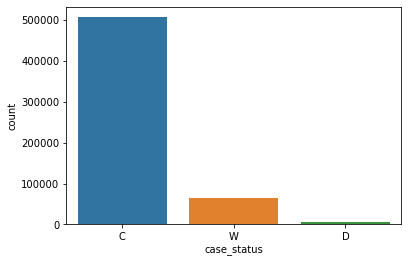

In [117]:
sns.countplot(data=df_eda,x="case_status")

On plotting a countplot for case_status(target variable) found most of the applications were accepted. There is a big imbalance in the target column

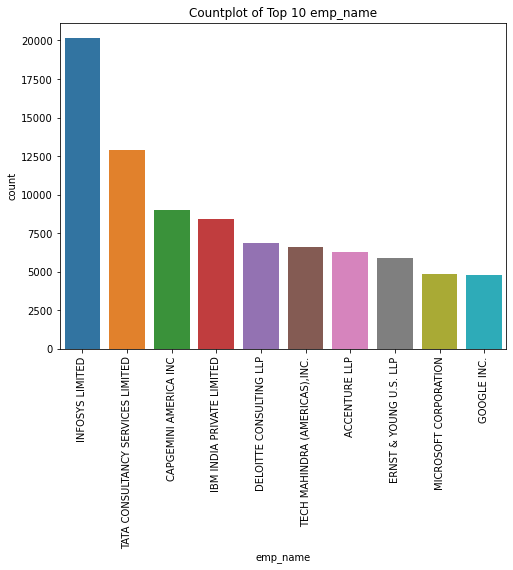

In [118]:
# Get the top 5 categories by count
top_10_categories = df_eda["emp_name"].value_counts().nlargest(10)

# Filter the data for the top 10 categories
data_top_10 = df_eda[df_eda["emp_name"].isin(top_10_categories.index)]

# Plot a countplot of the top 10 categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_top_10, x= "emp_name", order=top_10_categories.index,)
plt.title('Countplot of Top 10 ' + "emp_name")
plt.xticks(rotation=90)
plt.show()

Based on the above graph we are able to understand that Infosys, TCS and Capgemini are the top employers submitting most number of visa application

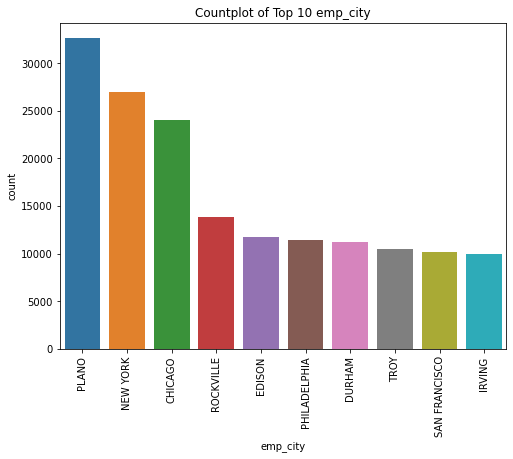

In [119]:
# Get the top 5 categories by count
top_10_categories = df_eda["emp_city"].value_counts().nlargest(10)

# Filter the data for the top 10 categories
data_top_10 = df_eda[df_eda["emp_city"].isin(top_10_categories.index)]

# Plot a countplot of the top 10 categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_top_10, x= "emp_city", order=top_10_categories.index,)
plt.title('Countplot of Top 10 ' + "emp_city")
plt.xticks(rotation=90)
plt.show()

Most number of application are submitted from Plano city, followed by New York and Chicago

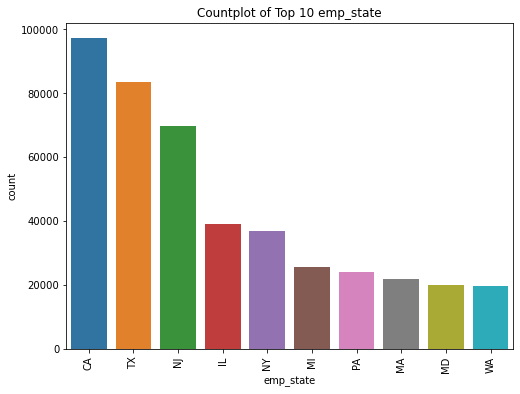

In [120]:
# Get the top 5 categories by count
top_10_categories = df_eda["emp_state"].value_counts().nlargest(10)

# Filter the data for the top 10 categories
data_top_10 = df_eda[df_eda["emp_state"].isin(top_10_categories.index)]

# Plot a countplot of the top 10 categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_top_10, x= "emp_state", order=top_10_categories.index,)
plt.title('Countplot of Top 10 ' + "emp_state")
plt.xticks(rotation=90)
plt.show()

California,Texas,New Jersey are top states from which most of the applications are being submitted

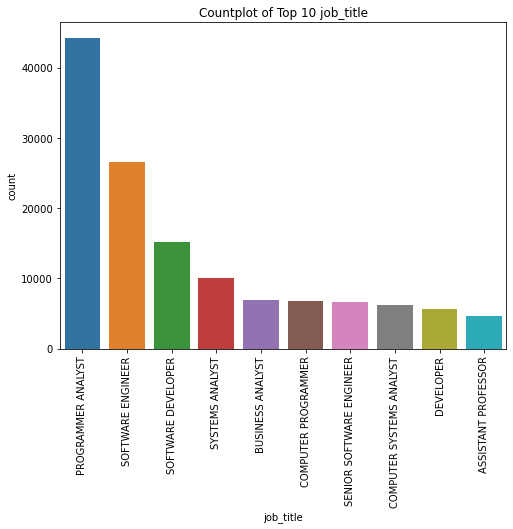

In [121]:
# Get the top 5 categories by count
top_10_categories = df_eda["job_title"].value_counts().nlargest(10)

# Filter the data for the top 5 categories
data_top_10 = df_eda[df_eda["job_title"].isin(top_10_categories.index)]

# Plot a countplot of the top 5 categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_top_10, x= "job_title", order=top_10_categories.index,)
plt.title('Countplot of Top 10 ' + "job_title")
plt.xticks(rotation=90)
plt.show()

Programmer Analyst is the top role of the applicants followed by Software Engineer and Software Developer

<AxesSubplot:xlabel='full_time_position', ylabel='count'>

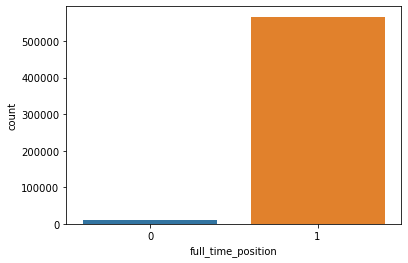

In [122]:
sns.countplot(df_eda["full_time_position"])

In [123]:
df_eda["full_time_position"].value_counts()

1    566676
0     11979
Name: full_time_position, dtype: int64

Most of the applications are being submitted by the full time employees and the application from the other category is very minimal

<AxesSubplot:xlabel='pw_level', ylabel='count'>

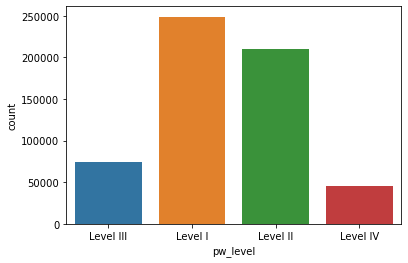

In [124]:
sns.countplot(df_eda["pw_level"])

Most the applicants fall under prewailing wage level-1 category

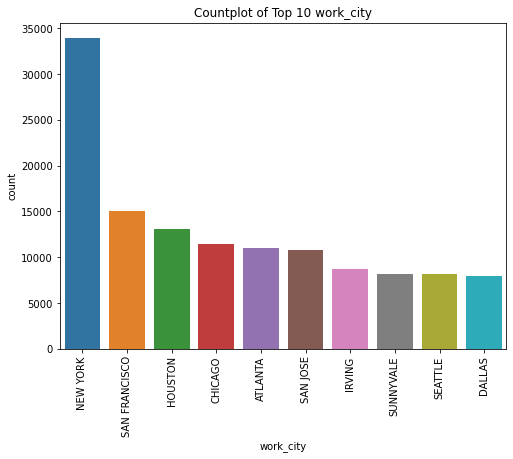

In [125]:
# Get the top 5 categories by count
top_10_categories = df_eda["work_city"].value_counts().nlargest(10)

# Filter the data for the top 5 categories
data_top_10 = df_eda[df_eda["work_city"].isin(top_10_categories.index)]

# Plot a countplot of the top 5 categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_top_10, x= "work_city", order=top_10_categories.index,)
plt.title('Countplot of Top 10 ' + "work_city")
plt.xticks(rotation=90)
plt.show()

Most of the applicants are applying to work in New York

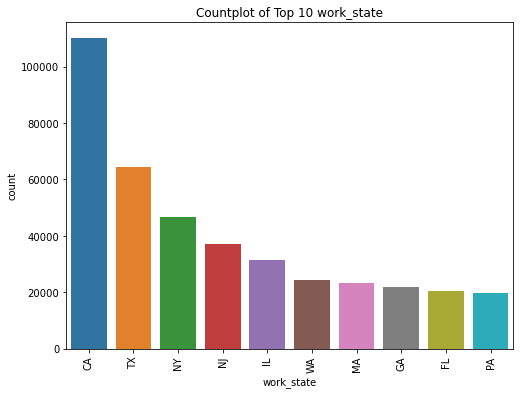

In [126]:
# Get the top 5 categories by count
top_10_categories = df_eda["work_state"].value_counts().nlargest(10)

# Filter the data for the top 5 categories
data_top_10 = df_eda[df_eda["work_state"].isin(top_10_categories.index)]

# Plot a countplot of the top 5 categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_top_10, x= "work_state", order=top_10_categories.index,)
plt.title('Countplot of Top 10 ' + "work_state")
plt.xticks(rotation=90)
plt.show()

CA is the top state where most applicants prefer to work for

In [127]:
df_eda.columns

Index(['case_status', 'emp_name', 'emp_city', 'emp_state', 'job_title',
       'soc_code', 'soc_name', 'full_time_position', 'prevailing_wage',
       'pw_level', 'wage_from', 'work_city', 'work_state', 'emp_h1b_dependent',
       'emp_willful_violator'],
      dtype='object')

<AxesSubplot:xlabel='emp_h1b_dependent', ylabel='count'>

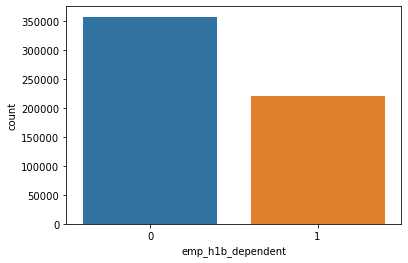

In [128]:
sns.countplot(df_eda["emp_h1b_dependent"])

Most of the employers are not H1B visa dependents i.e less than 15% of the employees of those employer is H1B visa holders

<AxesSubplot:xlabel='emp_willful_violator', ylabel='count'>

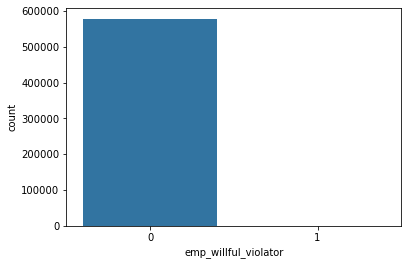

In [129]:
sns.countplot(df_eda["emp_willful_violator"])

In [130]:
df_eda["emp_willful_violator"].value_counts()

0    578231
1       424
Name: emp_willful_violator, dtype: int64

Only few employers are willful violators

### Bivariate Analysis

<AxesSubplot:xlabel='prevailing_wage', ylabel='wage_from'>

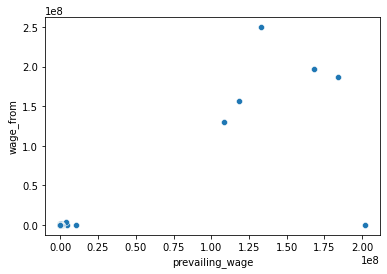

In [131]:
sns.scatterplot(data = df_eda,x = "prevailing_wage",y = "wage_from")

<AxesSubplot:xlabel='prevailing_wage', ylabel='wage_from'>

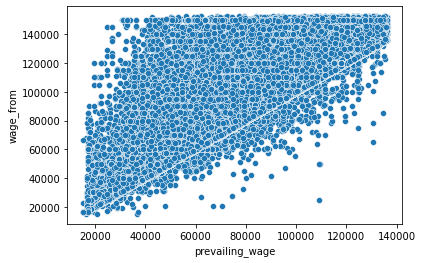

In [132]:
sns.scatterplot(data = df_out,x = "prevailing_wage",y = "wage_from")

#### Numerical vs Categorical

<AxesSubplot:xlabel='emp_h1b_dependent', ylabel='prevailing_wage'>

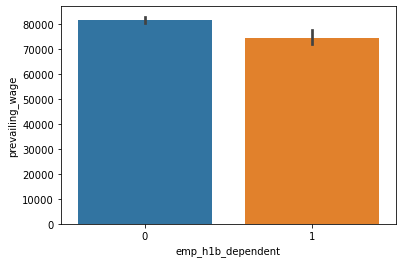

In [133]:
sns.barplot(data = df_eda,x = "emp_h1b_dependent", y= "prevailing_wage")

There is no big difference in prevailing wage of employers who are dependent on H1-B and the employers who are independent of H1-B

<AxesSubplot:xlabel='full_time_position', ylabel='prevailing_wage'>

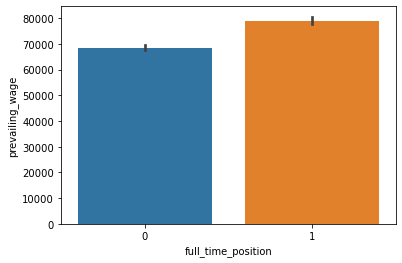

In [134]:
sns.barplot(data = df_eda,x = "full_time_position", y= "prevailing_wage")

Full time employees earn slightly more than than the part time employees

<AxesSubplot:xlabel='pw_level', ylabel='prevailing_wage'>

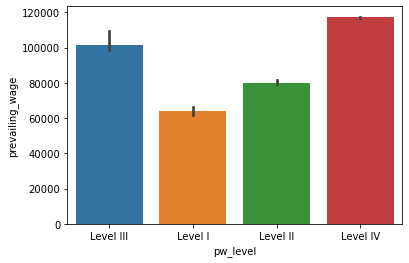

In [135]:
sns.barplot(data = df_eda,x = "pw_level", y= "prevailing_wage")

PW-Level 4 employees earn more than the other category

<AxesSubplot:xlabel='emp_state'>

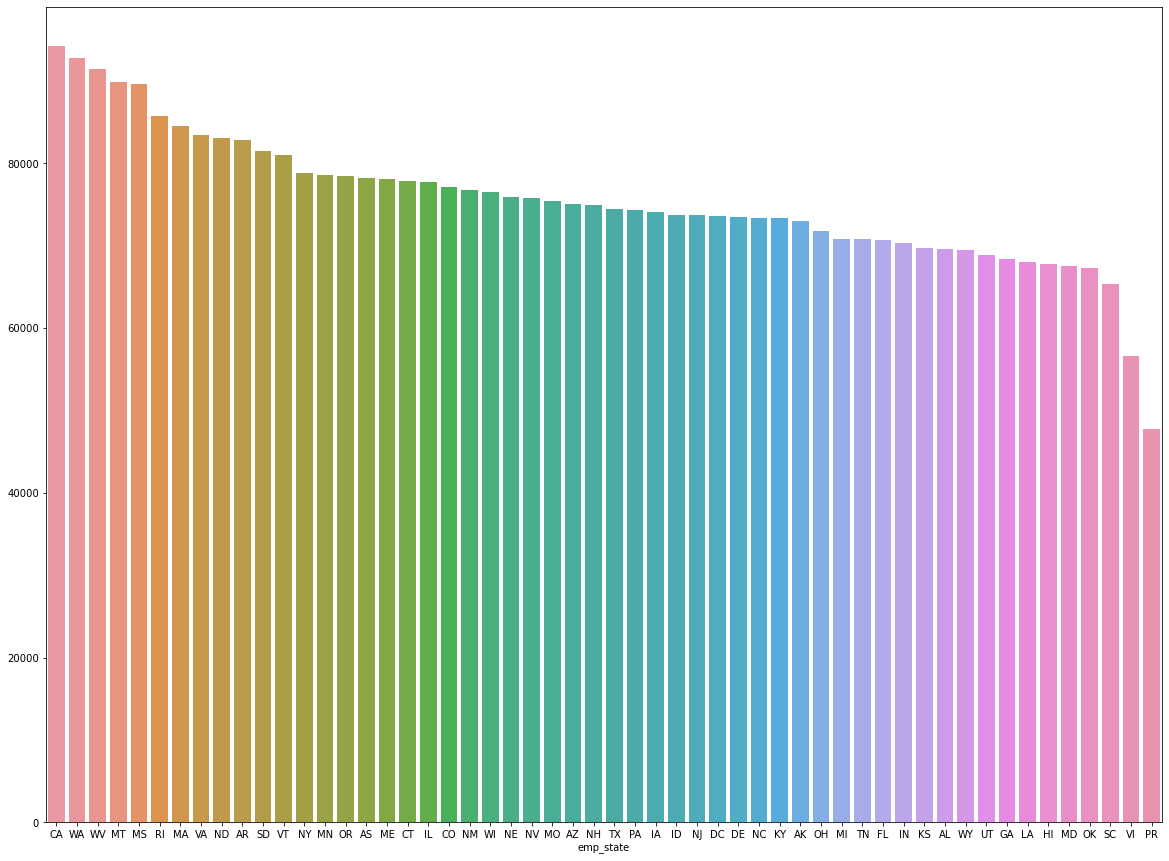

In [136]:
plt.figure(figsize=(20,15))
grouped = df_eda.groupby('emp_state')['prevailing_wage'].mean().sort_values(ascending=False)
sns.barplot(x=grouped.index, y=grouped.values, order=grouped.index)

California provides the highest prevailing wage followed by Washington however there is no big difference in the wage

<AxesSubplot:xlabel='emp_state'>

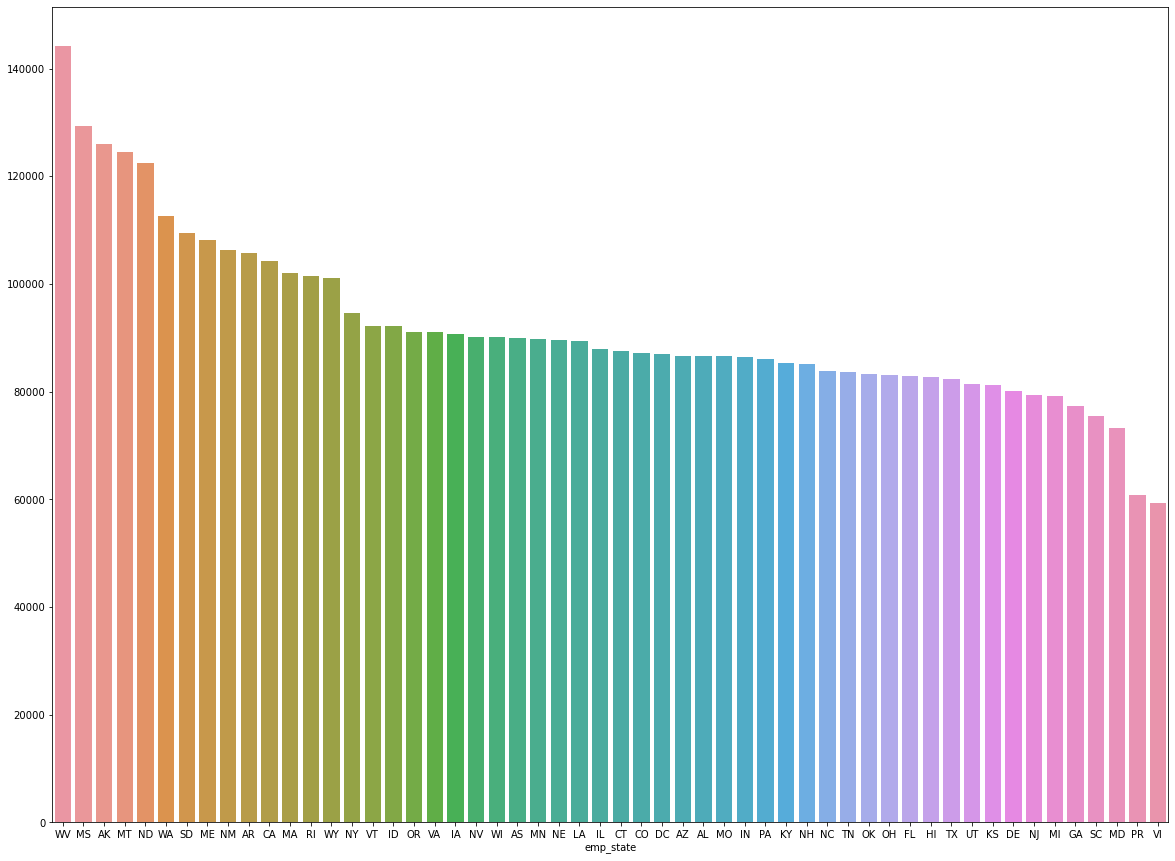

In [137]:
plt.figure(figsize=(20,15))
grouped = df_eda.groupby('emp_state')['wage_from'].mean().sort_values(ascending=False)
sns.barplot(x=grouped.index, y=grouped.values, order=grouped.index)

West virginia employers offers higher wage compared to other states

<AxesSubplot:xlabel='work_state'>

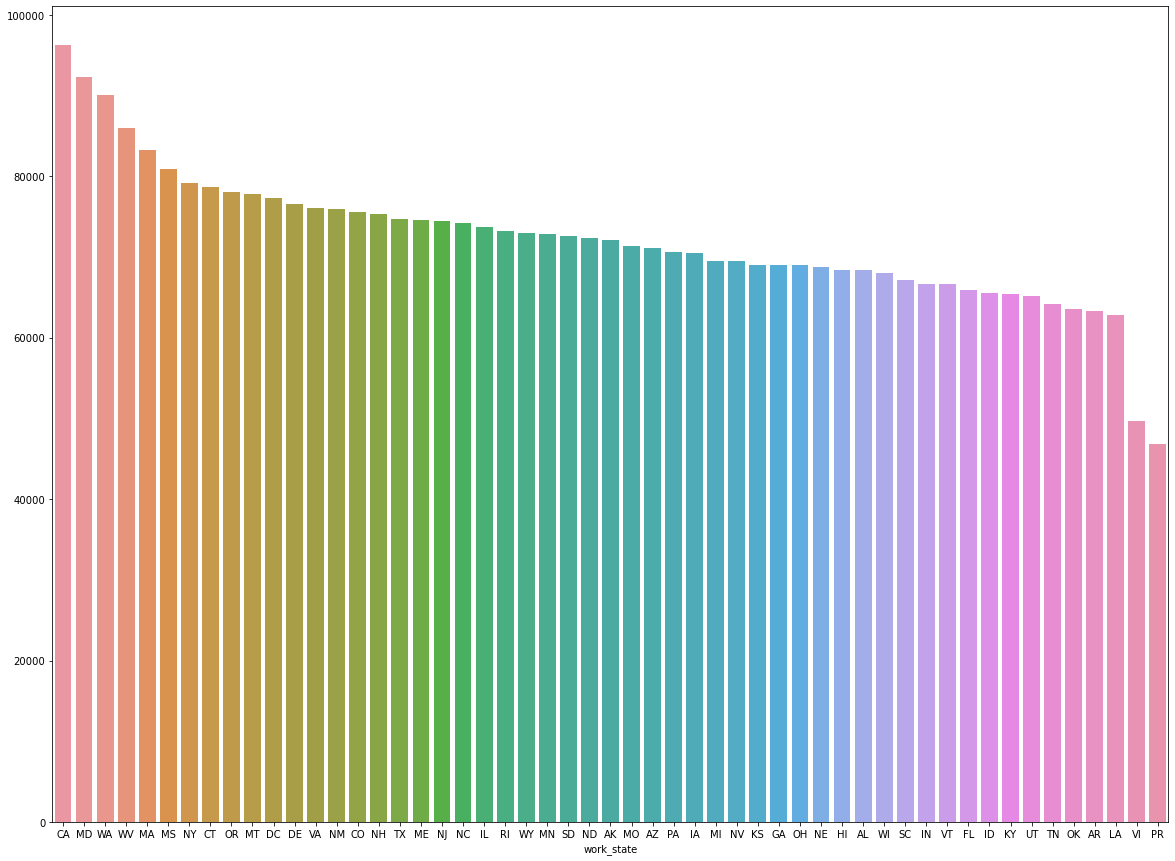

In [138]:
plt.figure(figsize=(20,15))
grouped = df_eda.groupby('work_state')['prevailing_wage'].mean().sort_values(ascending=False)
sns.barplot(x=grouped.index, y=grouped.values, order=grouped.index)

Employees who migrate to California receives a higher wage compared to other states

<AxesSubplot:xlabel='work_state'>

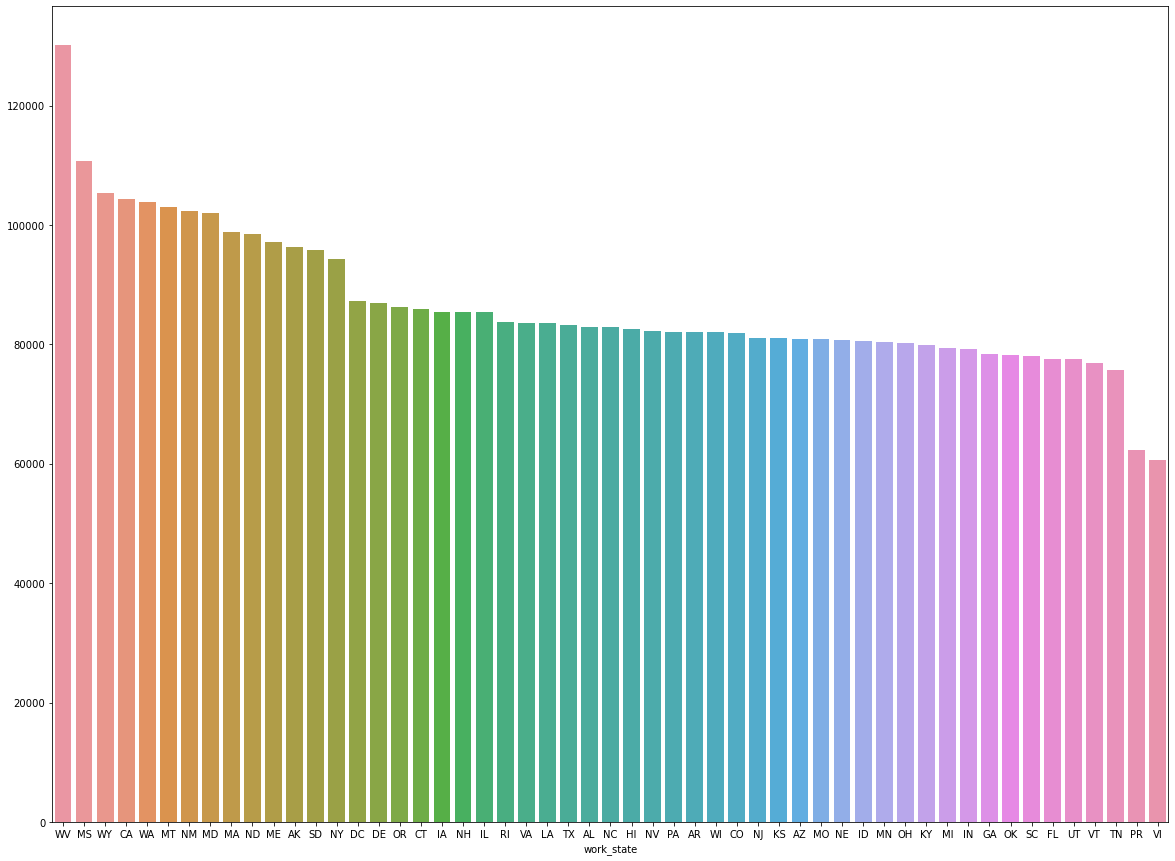

In [139]:
plt.figure(figsize=(20,15))
grouped = df_eda.groupby('work_state')['wage_from'].mean().sort_values(ascending=False)
sns.barplot(x=grouped.index, y=grouped.values, order=grouped.index)

West virginia employers offers higher wage compared to other states

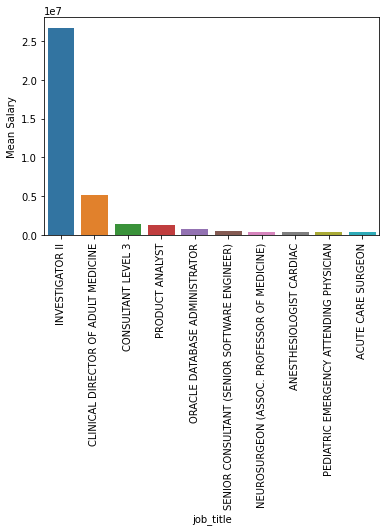

In [150]:
# Group the data by 'job_title' and calculate the mean wage_from for each group
grouped = df_eda.groupby('job_title')['prevailing_wage'].mean()

# Sort the groups in descending order based on the mean wage_from
grouped_sorted = grouped.sort_values(ascending=False)

# Select the top 10 job titles based on the sorted mean wage_from values
top_10_job_titles = grouped_sorted[:10].index.tolist()

# Filter the original data to keep only the top 10 job titles
df_top_10 = df_eda[df_eda['job_title'].isin(top_10_job_titles)]

# Group the filtered data by 'job_title' and calculate the mean wage_from for each group
grouped_top_10 = df_top_10.groupby('job_title')['prevailing_wage'].mean().sort_values(ascending=False)

# Plot the bar chart with the top 10 job titles
sns.barplot(x=grouped_top_10.index, y=grouped_top_10.values, order=grouped_top_10.index)
plt.xticks(rotation=90)
plt.ylabel('Mean Salary')
plt.show()

Investigator level 2 has the highest average salary compared to other designations

### Categorical vs Categorical

In [155]:
# Get the top 10 job titles based on count
top_10_jobs = df_eda['job_title'].value_counts().nlargest(10).index

# Filter the DataFrame to keep only the top 10 job titles
df_top_10_jobs = df_eda[df_eda['job_title'].isin(top_10_jobs)]

# Compute the frequency table of job_title and emp_h1b_dependent columns
freq_table = pd.crosstab(index=df_top_10_jobs['emp_h1b_dependent'], columns=df_top_10_jobs['job_title'])
freq_table

job_title,ASSISTANT PROFESSOR,BUSINESS ANALYST,COMPUTER PROGRAMMER,COMPUTER SYSTEMS ANALYST,DEVELOPER,PROGRAMMER ANALYST,SENIOR SOFTWARE ENGINEER,SOFTWARE DEVELOPER,SOFTWARE ENGINEER,SYSTEMS ANALYST
emp_h1b_dependent,,,,,,,,,,
0,4651,2965,1709,2106,605,9983,5392,6293,16125,2198
1,6,3933,5061,4105,4997,34254,1255,8875,10435,7928


In [156]:
# Get the top 10 job titles based on count
top_10_jobs = df_eda['job_title'].value_counts().nlargest(10).index

# Filter the DataFrame to keep only the top 10 job titles
df_top_10_jobs = df_eda[df_eda['job_title'].isin(top_10_jobs)]

# Compute the frequency table of job_title and emp_h1b_dependent columns
freq_table = pd.crosstab(index=df_top_10_jobs['full_time_position'], columns=df_top_10_jobs['job_title'])
freq_table

job_title,ASSISTANT PROFESSOR,BUSINESS ANALYST,COMPUTER PROGRAMMER,COMPUTER SYSTEMS ANALYST,DEVELOPER,PROGRAMMER ANALYST,SENIOR SOFTWARE ENGINEER,SOFTWARE DEVELOPER,SOFTWARE ENGINEER,SYSTEMS ANALYST
full_time_position,,,,,,,,,,
0,155,331,138,54,0,147,5,104,187,63
1,4502,6567,6632,6157,5602,44090,6642,15064,26373,10063


## Base model

In [157]:
df_new

,full_time_position,prevailing_wage,pw_level,wage_from,emp_h1b_dependent,emp_willful_violator,emp_name_freq,emp_city_freq,emp_state_freq,job_title_freq,soc_code_freq,soc_name_freq,work_city_freq,work_state_freq
0,1,187200.0,Level III,190000.00,0,0,2,24,1443,266,1678,1684,1,2760
1,1,39957.0,Level I,47507.00,0,0,29,29,598,150,410,410,16,847
2,1,59966.0,Level I,65000.00,0,0,31,54,17574,13,9040,9037,16,9544
3,1,78832.0,Level II,86988.15,0,0,28,34,978,6,3309,3315,16,9544
4,1,169645.0,Level I,450000.00,0,0,32,99,216,27,5247,5246,16,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579392,1,58968.0,Level I,58968.00,0,0,6833,11460,24064,119,118303,117979,11,5893
579393,1,106475.0,Level IV,106475.00,1,0,2545,2936,83583,20,2228,2199,11,5893
579394,1,77085.0,Level III,128520.00,1,0,207,753,4342,736,54304,49734,11,5893
579395,1,58968.0,Level I,58968.00,0,0,6833,11460,24064,119,118303,117979,11,5893


Since emp_name, city, state, job_title, soc_code, soc_name have large number of unique values, unable to determine what type of encoding needs to be done. Hence dropping those columns for the base model

In [158]:
df_base = df_new.drop(["emp_name_freq","emp_city_freq","emp_state_freq","job_title_freq","soc_code_freq","soc_name_freq","work_city_freq","work_state_freq"],axis=1)

In [160]:
df_base["pw_level"].replace({"Level I":1,"Level II":2,"Level III":3,"Level IV":4},inplace=True)

In [161]:
df_base

,full_time_position,prevailing_wage,pw_level,wage_from,emp_h1b_dependent,emp_willful_violator
0,1,187200.0,3,190000.00,0,0
1,1,39957.0,1,47507.00,0,0
2,1,59966.0,1,65000.00,0,0
3,1,78832.0,2,86988.15,0,0
4,1,169645.0,1,450000.00,0,0
...,...,...,...,...,...,...
579392,1,58968.0,1,58968.00,0,0
579393,1,106475.0,4,106475.00,1,0
579394,1,77085.0,3,128520.00,1,0
579395,1,58968.0,1,58968.00,0,0


In [163]:
x = df_base
y = df_eda["case_status"]

In [164]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=100)

In [165]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(xtrain,ytrain)
ypred = dt_model.predict(xtest)

In [167]:
result = classification_report(ytest,ypred)
print(result)

              precision    recall  f1-score   support

           C       0.90      0.95      0.92    151906
           D       0.32      0.20      0.24      2010
           W       0.39      0.25      0.30     19681

    accuracy                           0.86    173597
   macro avg       0.54      0.46      0.49    173597
weighted avg       0.84      0.86      0.84    173597

